# BET surface area calculations

Let's do a calculation of the BET surface area for these samples. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


We use the `area_BET` function, and we first want to look at how the framework attempts to calculate the good BET region on its own. For this we pass the `verbose` parameter and then use matplotlib to display the graph.

MCM-41
The slope of the BET line: s = 232.141
The intercept of the BET line: i = 7.038
C = 34
Amount for a monolayer: n = 0.00418 mol/unit
Minimum pressure point chosen is 0.049 and maximum is 0.433
BET surface area: a = 408 m²/unit


c:\users\pauli\onedrive\documents\phd documents\python\pygaps\src\pygaps\calculations\area_bet.py:278: UserWarning: The correlation is not linear
  warnings.warn("The correlation is not linear")


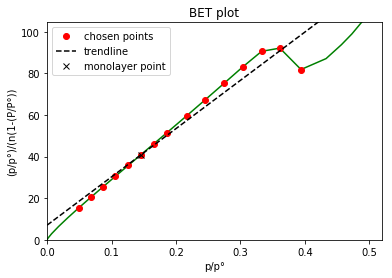

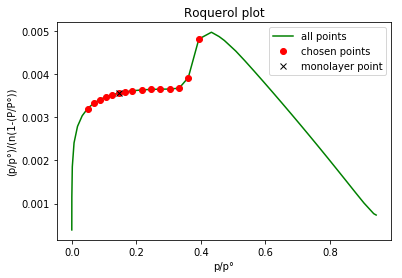

In [2]:
print(isotherms_n2_77k[0].sample_name)
pygaps.area_BET(isotherms_n2_77k[0], verbose=True)
plt.show()

It looks that, while the correlation wasn't perfectly straight, it is reasonably good. We got a warning that tells us that it could be better. We can restrict the pressure range manually to see what difference it would make.

MCM-41
The slope of the BET line: s = 263.691
The intercept of the BET line: i = 2.544
C = 104
Amount for a monolayer: n = 0.00376 mol/unit
Minimum pressure point chosen is 0.068 and maximum is 0.275
BET surface area: a = 366 m²/unit


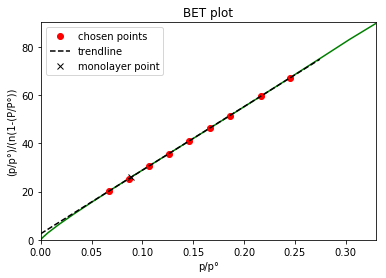

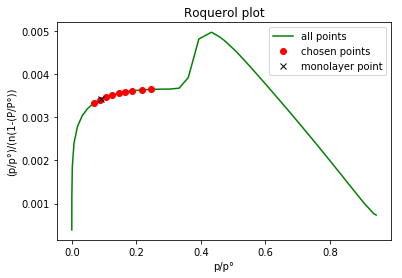

In [3]:
print(isotherms_n2_77k[0].sample_name)
pygaps.area_BET(isotherms_n2_77k[0], limits=(0.05, 0.3), verbose=True)
plt.show()

We have a better fit, and a diference of about 40 $m^2$. The initial guess wasn't that bad.

Now let's do the analysis on all of the nitrogen samples. Instead of looking at them graphically, we'll assume the framework makes a reasonably accurate choice. The function returns a dictionary with all the calculated parameters, so we'll just select the BET area from there.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.sample_name, pygaps.area_BET(isotherm)))
    
[(x, y['area']) for (x,y) in results]

c:\users\pauli\onedrive\documents\phd documents\python\pygaps\src\pygaps\calculations\area_bet.py:278: UserWarning: The correlation is not linear
  warnings.warn("The correlation is not linear")


[('MCM-41', 407.89000683368948),
 ('NaY', 700.9553926474382),
 ('SiO2', 214.47592039312602),
 ('Takeda 5A', 1110.6355133757006),
 ('UiO-66(Zr)', 1277.0119330505152)]

We also have the calorimetry isotherms, which were measured with $CO_2$ at room temperature. While there's no guarantee that the BET method is still applicable with this adsorbate and temperature, the framework can still attempt to perform the calculations.

It just happens that the carbon sample is the same in both isotherms. Let's see how the $CO_2$ BET surface area looks.

Takeda 5A
The slope of the BET line: s = 125.958
The intercept of the BET line: i = 5.04
C = 26
Amount for a monolayer: n = 0.00763 mol/unit
Minimum pressure point chosen is 0.027 and maximum is 0.253
BET surface area: a = 782 m²/unit


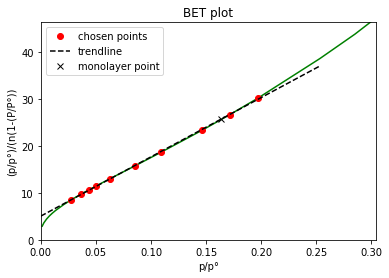

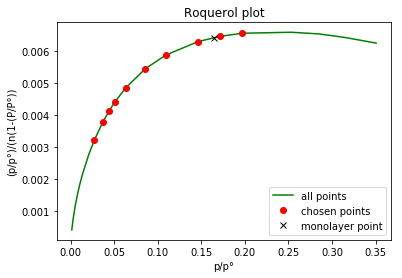

In [5]:
print(isotherms_calorimetry[1].sample_name)
pygaps.area_BET(isotherms_calorimetry[1], verbose=True)
plt.show()

The surface area obtained with carbon dioxide is around 780 $m^2$. Compared to the nitrogen surface area of 1100 $m^2$, it is much smaller. While the checks implemented did not find anything wrong, this is likely due to interactions between carbon dioxide and the carbon surface leading to the breakdown of the BET theory.

While any kind of adsorbate and temperature can be analysed through the framework, result interpretation is left at the discretion of the user.

Now we'll compare the BET area with the Langmuir area in the [next notebook](area_langmuir.ipynb).